In [11]:
import pandas as pd
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix

In [12]:
df = pd.read_csv("resampled.csv")

X = df.drop('TenYearCHD', axis=1)
y = df['TenYearCHD']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = AdaBoostClassifier(n_estimators=100, learning_rate=1.0, random_state=42)
model.fit(X_train, y_train)

c:\Users\NikitaRampurkarV-Sof\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


AdaBoostClassifier(n_estimators=100, random_state=42)

In [13]:
y_pred = model.predict(X_test)

In [14]:
# Predictions on training and testing sets
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# --- Training Metrics ---
print("🔹 Training Metrics")
print("Accuracy:", accuracy_score(y_train, y_train_pred))
print("Precision:", precision_score(y_train, y_train_pred))
print("Recall:", recall_score(y_train, y_train_pred))
print("F1 Score:", f1_score(y_train, y_train_pred))
print("\nClassification Report:\n", classification_report(y_train, y_train_pred))

# --- Testing Metrics ---
print("\n🔹 Testing Metrics")
print("Accuracy:", accuracy_score(y_test, y_test_pred))
print("Precision:", precision_score(y_test, y_test_pred))
print("Recall:", recall_score(y_test, y_test_pred))
print("F1 Score:", f1_score(y_test, y_test_pred))
print("\nClassification Report:\n", classification_report(y_test, y_test_pred))

🔹 Training Metrics
Accuracy: 0.7888058404310795
Precision: 0.7860291624279416
Recall: 0.7987594762232942
F1 Score: 0.7923431891984276

Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.78      0.79      2851
           1       0.79      0.80      0.79      2902

    accuracy                           0.79      5753
   macro avg       0.79      0.79      0.79      5753
weighted avg       0.79      0.79      0.79      5753


🔹 Testing Metrics
Accuracy: 0.78318276580959
Precision: 0.7690140845070422
Recall: 0.7867435158501441
F1 Score: 0.7777777777777778

Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.78      0.79       745
           1       0.77      0.79      0.78       694

    accuracy                           0.78      1439
   macro avg       0.78      0.78      0.78      1439
weighted avg       0.78      0.78      0.78      1439



In [17]:
conf_matrix = confusion_matrix(y_test, y_pred)
TN, FP, FN, TP = conf_matrix.ravel()

# Print results
print("True Positives (TP):", TP)
print("True Negatives (TN):", TN)
print("False Positives (FP):", FP)
print("False Negatives (FN):", FN)
total = TP+TN+FP+FN

accuracy = (TP+TN)/total
precision = TP/(TP+FP)
recall = TP/(TP+FN)
f1_score = 2*(precision * recall)/(precision + recall)
print(accuracy)
print(precision)
print(recall)
print(f1_score)

True Positives (TP): 546
True Negatives (TN): 581
False Positives (FP): 164
False Negatives (FN): 148
0.78318276580959
0.7690140845070422
0.7867435158501441
0.7777777777777777


In [16]:
import joblib
joblib.dump(model, 'adaboost_model.pkl')

['adaboost_model.pkl']

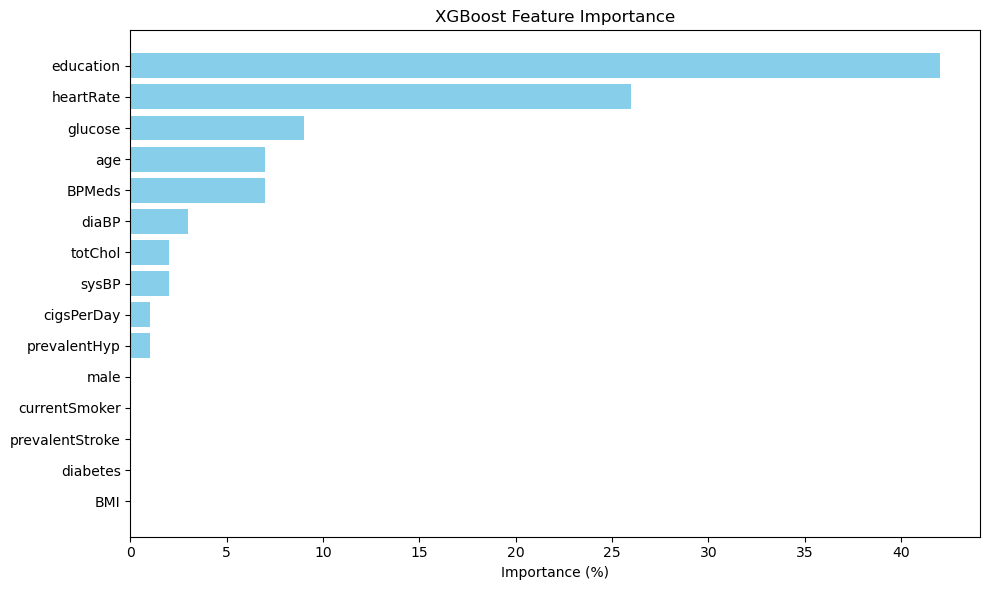

In [17]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Get feature importances from the model
importances = model.feature_importances_

# Convert to percentages
importances_percent = 100.0 * (importances / importances.sum())

# Create a DataFrame for better handling
feature_names = X_train.columns
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance (%)': importances_percent
}).sort_values(by='Importance (%)', ascending=False)

# Plot the bar graph
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance (%)'], color='skyblue')
plt.xlabel('Importance (%)')
plt.title('XGBoost Feature Importance')
plt.gca().invert_yaxis()  # Most important on top
plt.tight_layout()
plt.show()
